# Census Income Data Set

1. [Introduction](#Introduction)

    1.1 [Data Description](#Data-Description)
    
    1.2 [Categorical Attributes](#Categorical-Attributes)
    
    1.3 [Continuous Attributes](#Continuous-Attributes)
    

2. [Setup](#Setup)

    2.1 [Load Libraries](#Load-Libraries)
    
    2.2 [Suppress Warnings](#Suppress-Warnings)
    
    2.3 [Set Seed](#Set-Seed)
    
    2.4 [Display Options](#Display-Options)
    
    2.5 [Path Manager](#Path-Manager)
    
    2.6 [Define Custom Functions](#Define-Custom-Functions)
    
    2.7 [Load Data](#Load-Data)
    
    2.8 [Check Data Structure](#Check-Data-Structure)
    
3. [Missing Data](#Missing-Data)
    
    3.1 [Missing Data List](#Missing-Data-List)
    
    3.2 [Plot Percentage Missing](#Plot-Percentage-Missing)
    
    3.3 [Plot Percentage Not Missing](#Plot-Percentage-Not-Missing)

# Introduction
A census is the procedure of systematically acquiring and recording information about the members of a given population. The census is a special, wide-range activity, which takes place once a decade in the entire country. The purpose is to gather information about the general population, in order to present a full and reliable picture of the population in the country - its housing conditions and demographic, social and economic characteristics. The information collected includes data on age, gender, country of origin, marital status, housing conditions, marriage, education, employment, etc.

### Data Description
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). The prediction task is to determine whether a person makes over $50K a year.

### Categorical Attributes

- **workclass**: Individual work category
<br>
    - levels: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
<br>
<br>
- **education**: Individual's highest education degree
<br>
    - levels: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
<br>
<br>
- **marital-status**: Individual marital status
<br>
    - levels: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
<br>
<br>
- **occupation**: Individual's occupation
<br>
    - levels: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
<br>
<br>
- **relationship**: Individual's relation in a family
<br>
    - levels: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
<br>
<br>
- **race**: Race of Individual
<br>
    - levels: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
<br>
<br>
- **sex**: Individual's sex
<br>
    - levels: Female, Male.
<br>
<br>
- **native-country**: Individual's native country
<br>
    - levels: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
<br>
<br>


### Continuous Attributes

- **age**: Age of an individual
<br>
- **fnlwgt**: final weight 
<br>
- **capital-gain** 
<br>
- **capital-loss** 
<br>
- **hours-per-week**: Individual's working hour per week

# Setup

### Load Libraries

In [3]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
import numpy as np
import scikitplot
import missingno as msno
from pathlib import Path
import warnings
import random
from lime import lime_tabular
import shap
from sklearn import ensemble, preprocessing, tree, model_selection, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import StratifiedKFold
import xgboost
from mlxtend.classifier import StackingClassifier
from yellowbrick.classifier import ConfusionMatrix, ROCAUC, ClassificationReport, PrecisionRecallCurve, DiscriminationThreshold, ClassPredictionError, ClassBalance
from yellowbrick.model_selection import LearningCurve, ValidationCurve

### Suppress Warnings

In [2]:
def warn(*args, **kwargs):
    pass
#import warnings
warnings.warn = warn

### Set Seed

In [3]:
# Seed for reproducibility.
random.seed(10)

### Display Options

In [4]:
# Display all dataframe columns.
pd.set_option('display.max_columns', None)

# Display all dataframe rows.
pd.set_option('display.max_rows', None)

### Path Manager

In [5]:
# Make project folder working directory.
%cd "C:\Users\STPI0560\Desktop\Python Projects\Adult Income"

C:\Users\STPI0560\Desktop\Python Projects\Adult Income


### Define Custom Functions

In [6]:
# %load "bin\getDuplicateColumns.py"
def getDuplicateColumns(df):
    '''
    Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.
    '''
    # Define empty set.
    duplicateColumnNames = set()
    
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
    
        # Select column at xth index.
        col = df.iloc[:, x]
        
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
        
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
            
                duplicateColumnNames.add(df.columns.values[y])
                
    return list(duplicateColumnNames)

In [7]:
# %load "bin\plotPredictors.py"
def plotPredictors(data, predictor, width, height):
    '''
    Return a plot with frequency of categorical variables for an inputed predictor.
    data: Input dataframe in pandas format.
    predictor: Name of predictor column, in quotes ("").
    width: Width of plot.
    height: Height of plot.
    '''
    # Set plot size.
    plt.figure(figsize = (width, height))
    
    # Set title.
    plt.title(predictor)
    
    # Define graph.
    ax = sns.countplot(x = predictor, data = data, hue = "income")
    
    # If predictor is occupation, tilt x-axis labels (so they fit)...
    if predictor == "occupation" or "native-country":
        plt.xticks(rotation=30)
        for p in ax.patches:
            height = p.get_height()
            return plt.show()
    # ... otherwise, don't tilt x-axis labels.
    else:
        for p in ax.patches:
            height = p.get_height()
            return plt.show()

In [8]:
# %load "bin\testClassifiers.py"
def testClassifiers(classifierList, X_train, y_train, X_test, y_test):
    '''
    Return a dataframe with 1 row for each classifier inputed in the function's
    arguements. Each row contains: Classifier name, accuracy, recall score, and
    precision score.
    data: Input: classifierList, X_train, y_train, X_test, y_test. 
    classifierList: List of classifiers you want to test. 
    Example: [DecisionTreeClassifier, KNeighborsClassifier, GaussianNB].
    X_train: Matrix of training predictors (numeric).
    y_train: Vector of training response variable identity (numeric).
    X_test: Matrix of testing predictors (numeric).
    y_test: Vector of testing response variable identity (numeric).

    '''
    # Make empty dataframe.
    model_df = pd.DataFrame(columns=['Classifier', 'Accuracy', 'Recall', 'Precision'])

    # Repeat for each classifier in the list defined in the functions arguement.
    for i in classifierList:
        
        # For each model:
        model = i()
        
        # Get model name from current classifier.
        model_name = type(model).__name__
        
        # Fit the data with the training model.
        model.fit(X_train, y_train)
        
        # make predictions on test data using training model.
        yhat = model.predict(X_test)
        
        # test accuracy for current model.
        acc = accuracy_score(y_test, yhat)
        
        # test recall for current model
        recall = recall_score(y_test, yhat)
        
        # test precision for current model.
        precision = precision_score(y_test, yhat)
    
        # Create list for model i with caculated information.
        row = [model_name, acc, recall, precision]
        
        # Add list as new row in model_df.
        model_df.loc[len(model_df)] = row
    
    # Return dataframe with performance of each model.
    return model_df

In [9]:
print(pd.__file__)

C:\Users\STPI0560\anaconda3\lib\site-packages\pandas\__init__.py


### Load Data

In [10]:
# Read data.
df = pd.read_csv('data\Adult.csv')

### Check Data Structure

In [11]:
# Glimps dataframe.
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [12]:
# Check shape of data.
df.shape

(48842, 15)

In [13]:
# Check data type of each column.
print('Data type of each column of Dataframe :')
df.dtypes

Data type of each column of Dataframe :


age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [14]:
# Summary statistics.
df.describe(include = 'all')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842,4.884200e+04,48842,48842.000000,48842,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842,48842
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [15]:
# Remove "-" from column names.
df = df.rename(columns={'educational-num': 'educational_num', 'marital-status': 'marital_status', 'capital-gain': 'capital_gain', 'capital-loss': 'capital_loss', 'hours-per-week': 'hours_per_week', 'native-country': 'native_country'})

# Missing Data

### Missing Data List

In [16]:
# Print a list of each column that has at least 1 missing value.
print('List of columns with missing values:', [col for col in df.columns if df[col].isnull().any()], '\n')
print('Number of missing values per column:')

# Number of missing variables for each predictor, as a percentage.
df.isnull().mean() * 100

List of columns with missing values: [] 

Number of missing values per column:


age                0.0
workclass          0.0
fnlwgt             0.0
education          0.0
educational_num    0.0
marital_status     0.0
occupation         0.0
relationship       0.0
race               0.0
gender             0.0
capital_gain       0.0
capital_loss       0.0
hours_per_week     0.0
native_country     0.0
income             0.0
dtype: float64

### Plot Percentage Missing

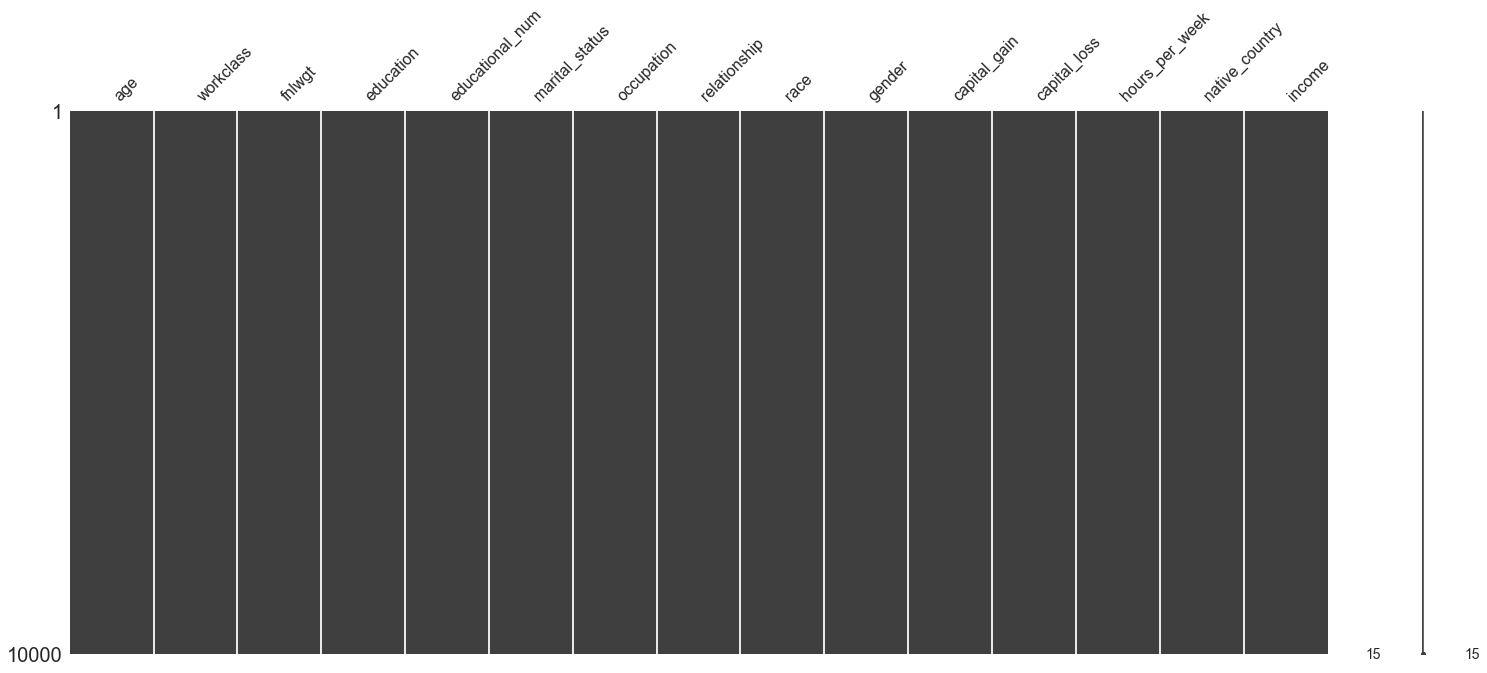

In [17]:
# Amount of missing data per predictor. White spots indicate missing values. If missing data are non-random, the line
# on the right of the graph will show a pattern.
ax = msno.matrix(df.sample(10000))
ax.get_figure().savefig('results\missingdata1.png')

### Plot Percentage Not Missing

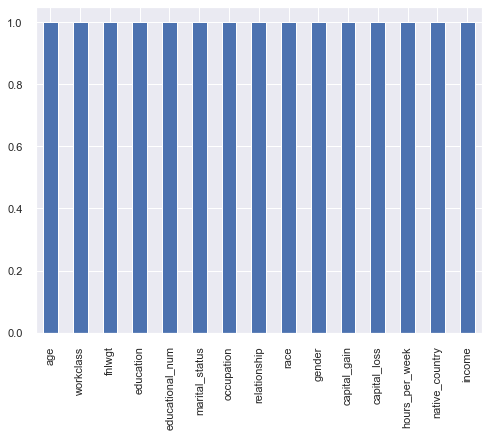

In [18]:
# set a grey background.
sns.set(style="darkgrid")

# Display proportion of non-missing data for each predictor.
fig, ax = plt.subplots(figsize = (8, 6))
(1 - df.isnull().mean()).abs().plot.bar(ax = ax)
fig.savefig("results/missingdata2.png", dpi = 300)

Conclusion: No missing data.

# Assess variables
Below I'm going to simultaniously plot the data and clean it if necessary. I'll do this in sections for each predictor. Categorical variable will go first, followed by continuous variables.

### Workclass

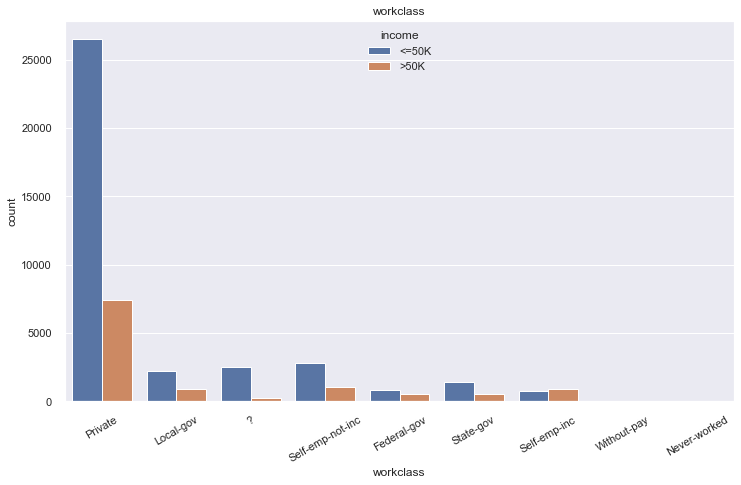

In [19]:
# set a grey background.
sns.set(style="darkgrid")

# Plot "workclass" labels.
plotPredictors(df, "workclass", 12, 7)

Some data are labelled "?". Many options on how to deal with this. We could remove all observations, or code a new column that is 1 when that observation was missing data, and 0 otherwise. What percentage of the dataset contains people whose workclass is "Private"?

In [20]:
# Display percentage of each instance in "workclass" column,
df['workclass'].value_counts(normalize = True) * 100

Private             69.419762
Self-emp-not-inc     7.907129
Local-gov            6.420703
?                    5.730724
State-gov            4.055935
Self-emp-inc         3.470374
Federal-gov          2.931903
Without-pay          0.042996
Never-worked         0.020474
Name: workclass, dtype: float64

69% of workclass are private, and only 5% are ?. Therefore, I'm going to change all instances of ? to "Private".

In [21]:
# Replace all instances of "?" in the "worclass" column with "Private",
df['workclass'] = df['workclass'].str.replace("?","Private")

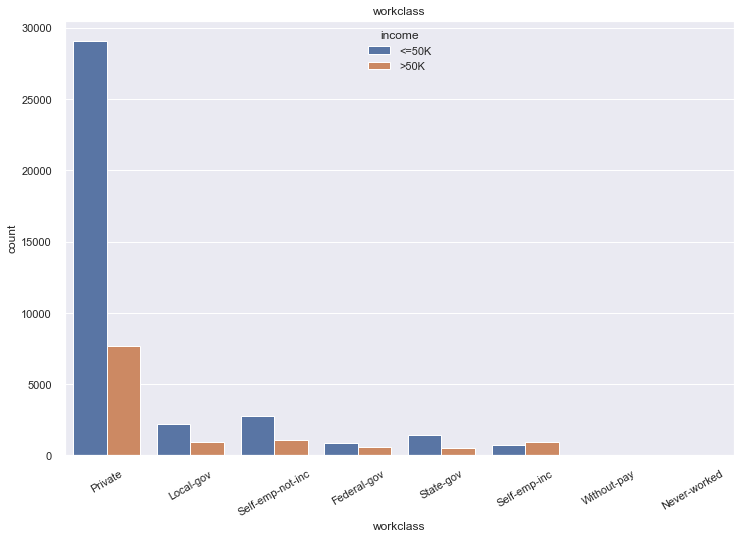

In [22]:
# set a grey background.
sns.set(style="darkgrid")

# Replot "workclass" labels.
plotPredictors(df, "workclass", 12, 8)

#### Interpretation:
Majority of people in all working class make less than '$50,000' a year, with the exception of those who are self-employed. 

### Education

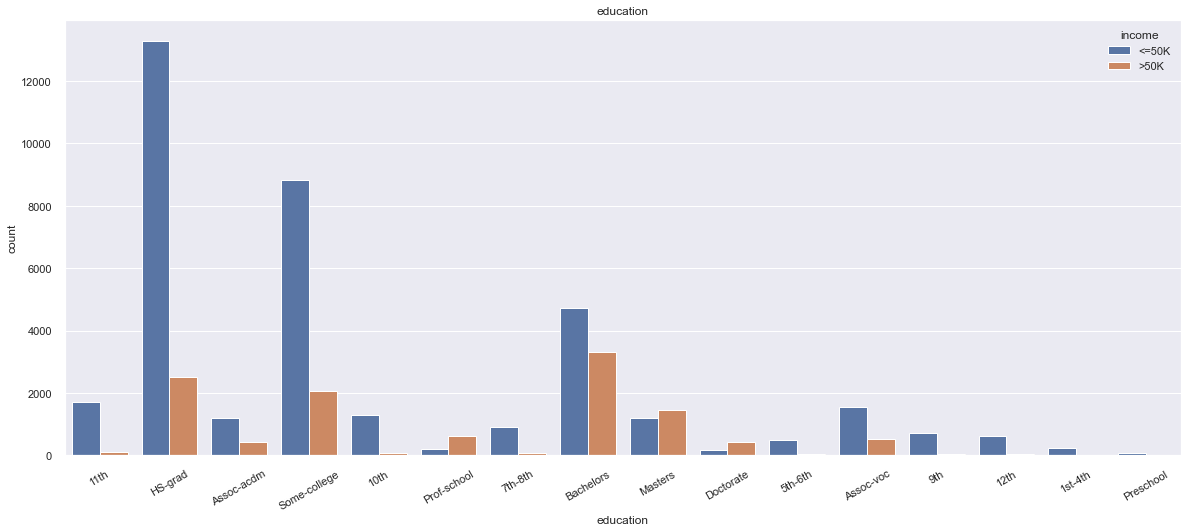

In [23]:
# set a grey background.
sns.set(style="darkgrid")

# Plot "education" column labels.
plotPredictors(df, "education", 20, 8)

#### Interpretation:
Some data from individuals in preschool and grade school. Might not be useful since anyone in elementary school or below won't make money, so we can always predict that they make less than 50,000 a year. However, these values may also help the model find patterns in those making less than 50,000 per year. Thus, we will keep them in.

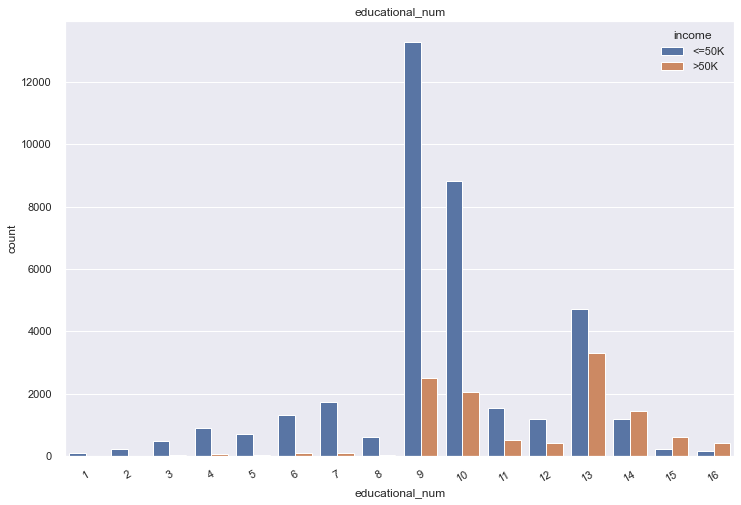

In [24]:
# set a grey background.
sns.set(style="darkgrid")

# Plot "educational_num" column labels.
plotPredictors(df, "educational_num", 12, 8)

#### Interpretation: 
This variable looks like a categorical version of "education". Redundent, so can probably be removed.

In [25]:
# Drop "educational_num" column.
df = df.drop(columns=['educational_num'])

### Marriage-status

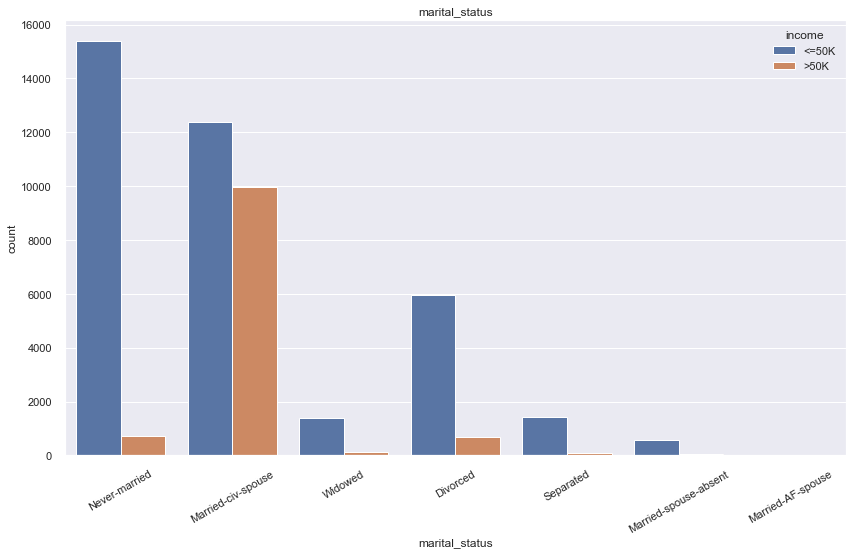

In [26]:
# set a grey background.
sns.set(style="darkgrid")

# Plot marital_status" column labels.
plotPredictors(df, "marital_status", 14, 8)

#### Interpretation:
Unsurprisingly, married people seem to be the group who make a majority of people making more than 50,000 per year.

### Occupation

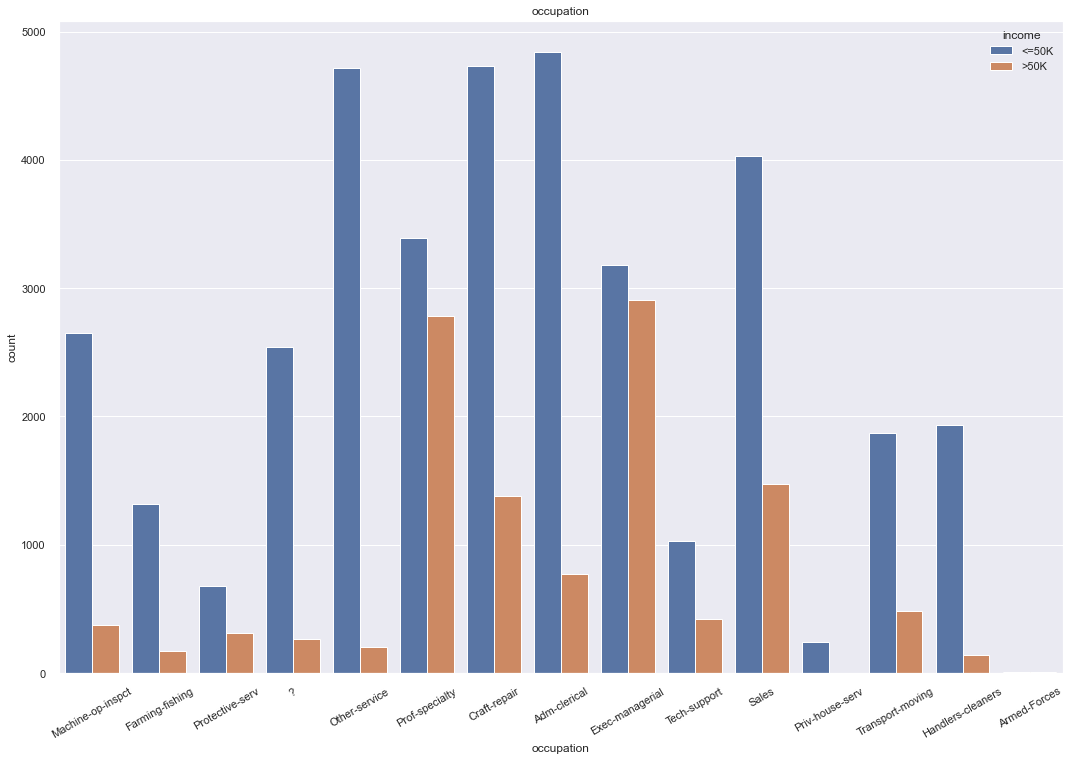

In [27]:
# set a grey background.
sns.set(style="darkgrid")

# Plot "occupation" column labels.
plotPredictors(df, "occupation", 18, 12)

Conclusion:Some data are labelled "?".

In [28]:
# Display percentage of each instance in "workclass" column,
df['occupation'].value_counts(normalize = True) * 100

Prof-specialty       12.636665
Craft-repair         12.513820
Exec-managerial      12.460587
Adm-clerical         11.488064
Sales                11.268990
Other-service        10.079440
Machine-op-inspct     6.187298
?                     5.751198
Transport-moving      4.821670
Handlers-cleaners     4.242251
Farming-fishing       3.050653
Tech-support          2.960567
Protective-serv       2.012612
Priv-house-serv       0.495475
Armed-Forces          0.030711
Name: occupation, dtype: float64

In [29]:
# Replace all instances of "?" with "Prof-specialty".
df['occupation'] = df['occupation'].str.replace("?","Prof-speciality")

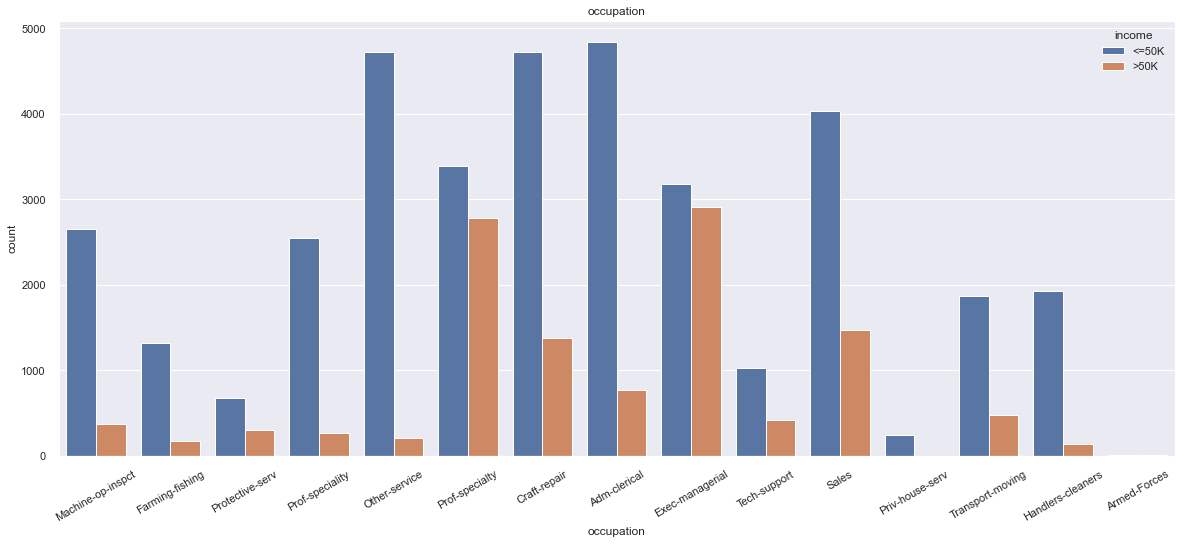

In [30]:
# set a grey background.
sns.set(style="darkgrid")

# Replot "occupation" column labels.
plotPredictors(df, "occupation", 20, 8)

#### Interpretation:
A few groups (for instance, Exec-managerial) seem to make the majority of people making more than 50,000 per year.

### Relationship

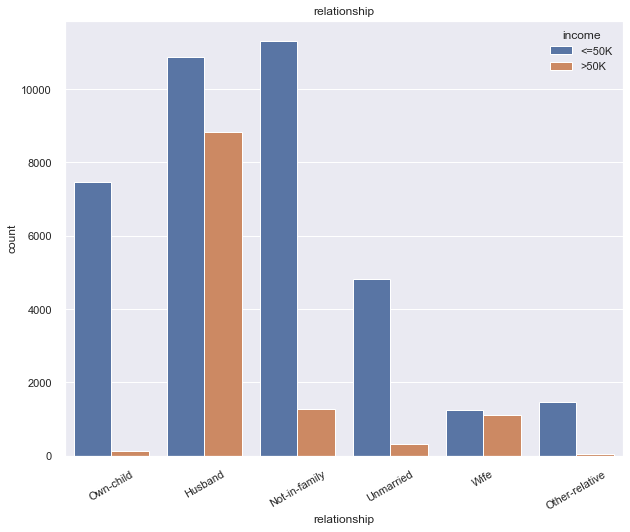

In [31]:
# set a grey background.
sns.set(style="darkgrid")

# Plot "relationship" column labels.
plotPredictors(df, "relationship", 10, 8)

#### Interpretation:
While wives are much less represented (probably because the dataset has more males), they seem to be just as likely to be in either category. Married people in general earn more.

### Race

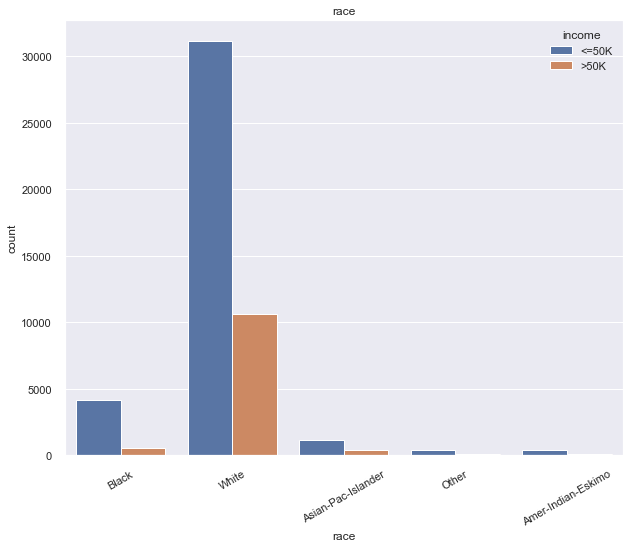

In [32]:
# set a grey background.
sns.set(style="darkgrid")

# Plot "race" column labels.
plotPredictors(df, "race", 10, 8)

#### Interpretation:
Whites seem to be more likely to make more the 50,000 per year.

### Gender

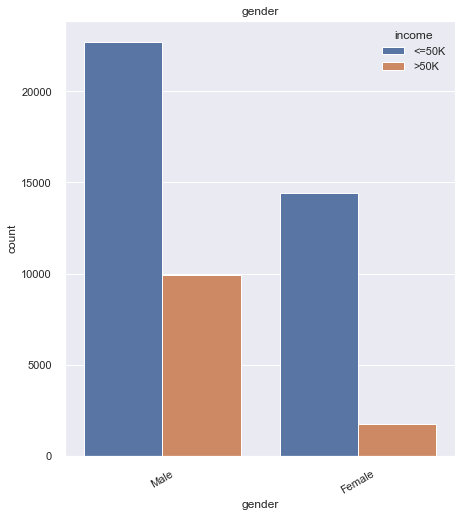

In [33]:
# set a grey background.
sns.set(style="darkgrid")

# Plot "gender" column labels.
plotPredictors(df, "gender", 7, 8)

#### Interpretation:
Males are more likely to make more than 50,000 per year.

### Native-Country

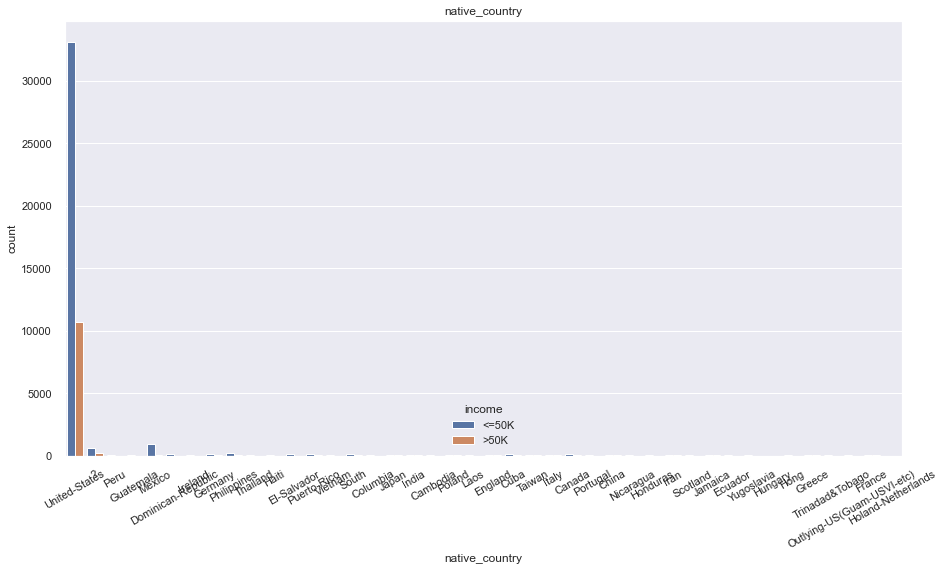

In [34]:
# set a grey background.
sns.set(style="darkgrid")

# Plot "gender" column labels.
plotPredictors(df, "native_country", 15, 8)

United states is so dominant, it is hard to see the other groups. We should remove the United States to see the others better.

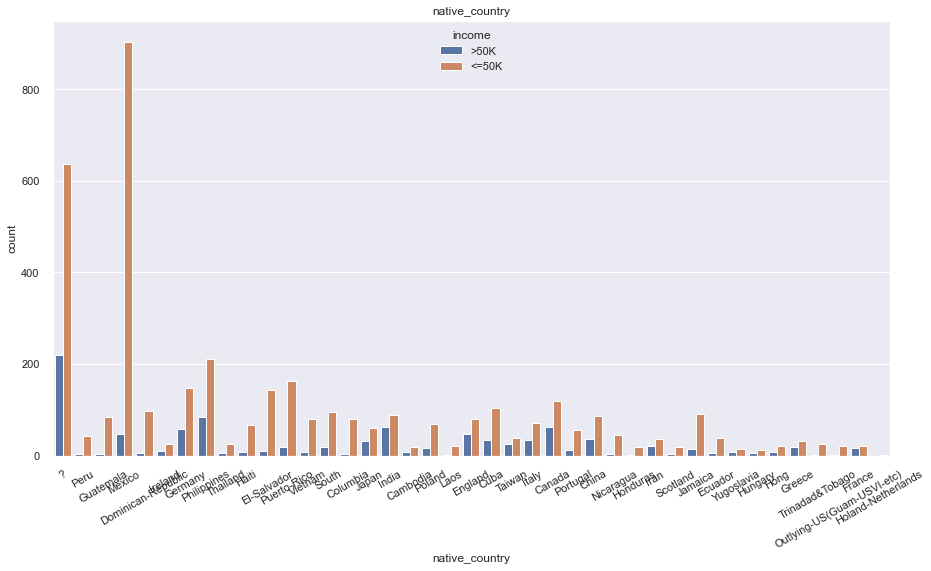

In [35]:
#df2 = (df['native_country'] == 'United-States')

df2 = df[df['native_country'] != 'United-States']

# set a grey background.
sns.set(style="darkgrid")

# Plot "gender" column labels.
plotPredictors(df2, "native_country", 15, 8)

Some data are labelled "?". We should see how they are represented compared to the other groups.

In [36]:
# Display percentage of each instance in "workclass" column,
df['native_country'].value_counts(normalize = True) * 100

United-States                 89.742435
Mexico                         1.947095
?                              1.754637
Philippines                    0.603988
Germany                        0.421768
Puerto-Rico                    0.376725
Canada                         0.372630
El-Salvador                    0.317350
India                          0.309160
Cuba                           0.282544
England                        0.260022
China                          0.249785
South                          0.235453
Jamaica                        0.217026
Italy                          0.214979
Dominican-Republic             0.210884
Japan                          0.188362
Guatemala                      0.180173
Poland                         0.178125
Vietnam                        0.176078
Columbia                       0.174031
Haiti                          0.153556
Portugal                       0.137177
Taiwan                         0.133082
Iran                           0.120798


1.7% of respondents have '?' as a country. Since the United States covers 89% of respondents native countries, I will replace all '?' with 'United-States'. Additionally, 1.75% of respondents are listed as being from 'Inited States'. This is a strange error, but these will all be changed to United States as well.

In [37]:
# Replace all instances of "?" in the "worclass" column with "Private",
df['native_country'] = df['native_country'].str.replace("?","United-States")
df['native_country'] = df['native_country'].str.replace("Inited-States","United-States")

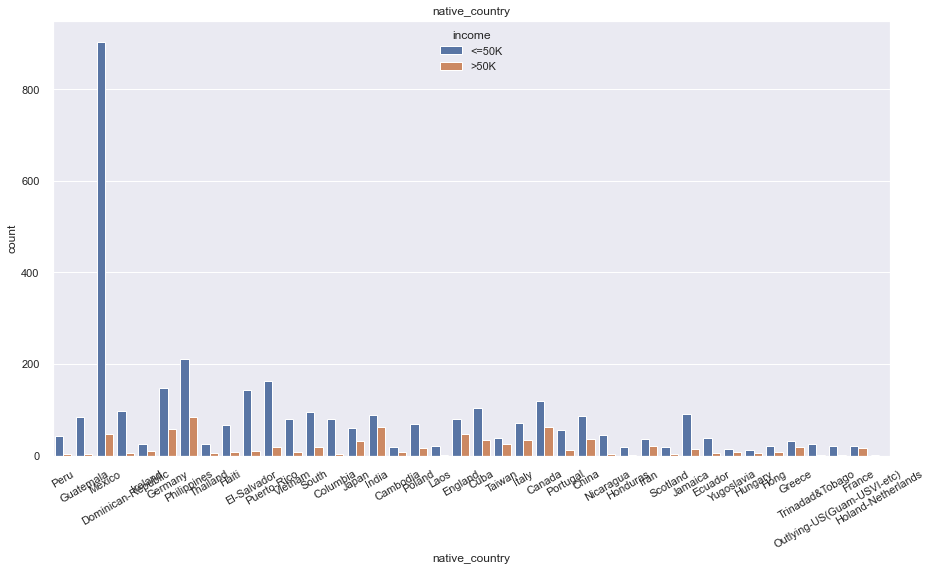

In [38]:
df2 = df[df['native_country'] != 'United-States']

# set a grey background.
sns.set(style="darkgrid")

# Plot "gender" column labels.
plotPredictors(df2, "native_country", 15, 8)

#### Interpretation
No group is more likely to make more than 50,000 per year, but groups like Guatemala are far more likely to make less than 50,000 per year.

### Capital-Gain/Capital-loss

<AxesSubplot:xlabel='capital_gain', ylabel='capital_loss'>

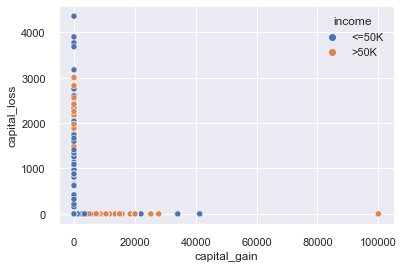

In [39]:
# set a grey background.
sns.set(style="darkgrid")

# Set plot layout.
fig, ax = plt.subplots(figsize=(6, 4))

# Dsiplay scatterplot.
#df.plot.scatter(x = "capital_gain", y = "capital_loss", ax = ax, alpha = 0.3)

sns.scatterplot(data=df, x="capital_gain", y="capital_loss", hue="income")

#### Interpretation:
When people have zero capital gain, they have large capital-loss, and vis-versa. Perhaps these can be combined into a "capital-change" difference score variable.

In [40]:
# Make column "capital_diff" by taking the difference between "capital_gain" and "capital_loss".
df["capital_diff"] = df["capital_loss"] - df["capital_gain"]

# Drop columns "capital_gain" and "capital_loss".
df = df.drop(columns=['capital_gain', 'capital_loss'])

### Age

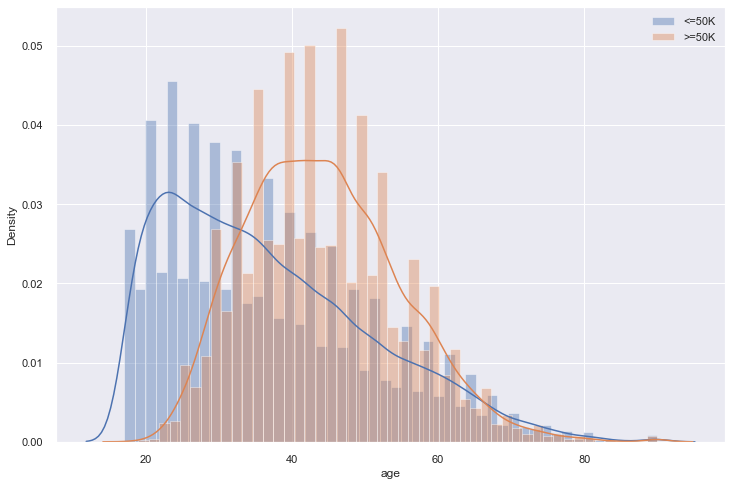

In [41]:
# set a grey background.
sns.set(style="darkgrid")

# Set plot layout.
fig, ax = plt.subplots(figsize=(12, 8))

# Make indicator for "income" plot.
mask = df["income"] == "<=50K"

# Split data by indicator.
ax = sns.distplot(df[mask].age, label='<=50K')
ax = sns.distplot(df[~mask].age,label='>=50K')

# Add legend.
ax.legend()

#### Interpretation:
People making less than 50,000 a year are younger, however, these proportions become almost identical once people reach retirement.

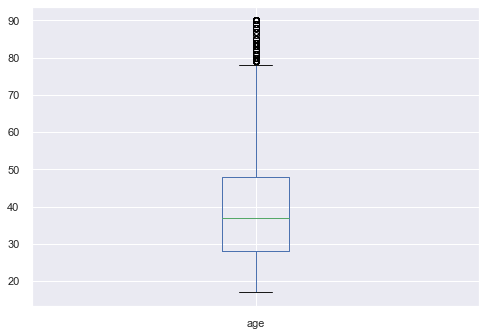

In [42]:
# set a grey background.
sns.set(style="darkgrid")

# Display box and whisker plot for "age" column.
df['age'].plot(kind='box')

# Display plot.
plt.show()

#### Interpretation:
Some outliers, but that's fine here. However, looking at the previous summary, the youngest person in the dataset is 17, yet there are people whose education stops at preschool. How is that possible?

In [43]:
print("The minimum age is:", df['age'].min(), "\n")

print("List of people with Preschool education: \n")
df.loc[df['education'] == 'Preschool']

The minimum age is: 17 

List of people with Preschool education: 



,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,income,capital_diff
779,64,Private,86837,Preschool,Married-civ-spouse,Handlers-cleaners,Husband,Asian-Pac-Islander,Male,40,Philippines,<=50K,0
818,21,Private,243368,Preschool,Never-married,Farming-fishing,Not-in-family,White,Male,25,Mexico,<=50K,0
1029,57,Private,274680,Preschool,Separated,Prof-speciality,Not-in-family,White,Male,40,United-States,<=50K,0
1059,31,Private,25610,Preschool,Never-married,Handlers-cleaners,Not-in-family,Amer-Indian-Eskimo,Male,25,United-States,<=50K,0
1489,19,Private,277695,Preschool,Never-married,Farming-fishing,Not-in-family,White,Male,36,Mexico,<=50K,0
1498,37,Self-emp-not-inc,227253,Preschool,Married-civ-spouse,Sales,Husband,White,Male,30,Mexico,<=50K,0
2364,21,Private,436431,Preschool,Married-civ-spouse,Prof-speciality,Other-relative,White,Female,40,Mexico,<=50K,0
2465,24,Private,403107,Preschool,Never-married,Adm-clerical,Not-in-family,White,Male,40,Mexico,<=50K,0
3037,54,Private,99208,Preschool,Married-civ-spouse,Prof-speciality,Husband,White,Male,16,United-States,<=50K,0
3540,29,Private,565769,Preschool,Never-married,Prof-speciality,Not-in-family,Black,Male,40,South,<=50K,0


People with only a pre-school education don't seem to have any obvious trends. It is definitely possible though for someone to never go to school as a kid/teenager (I looked it up), so this seems possible and I will keep them in the dataset.

### Hours-per-week

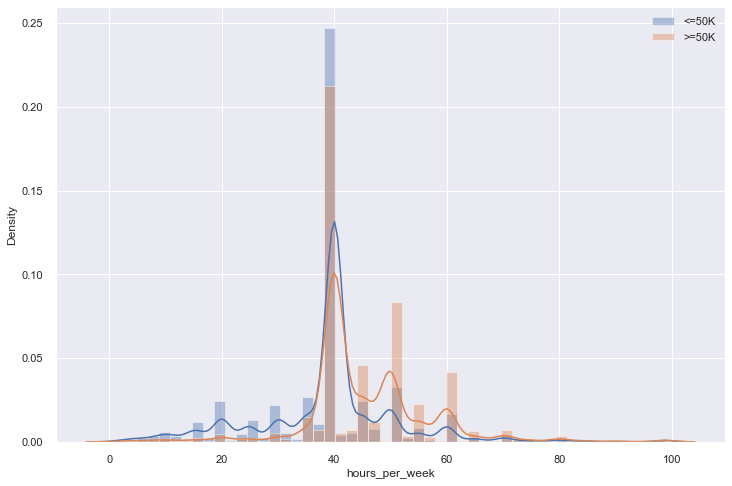

In [44]:
# set a grey background.
sns.set(style="darkgrid")

# Set plot layout.
fig, ax = plt.subplots(figsize=(12, 8))

# Make indicator for "income" plot.
mask = df["income"] == "<=50K"

# Split data by indicator.
ax = sns.distplot(df[mask]["hours_per_week"], label='<=50K')
ax = sns.distplot(df[~mask]["hours_per_week"],label='>=50K')

# Add legend.
ax.legend()

#### Interpretation:
Most people seem to work a standard 40 hour work week. People who work less than 40 hours per week typically make less than 50,000, while people who work more than 40 hours per week make more than 50,000.

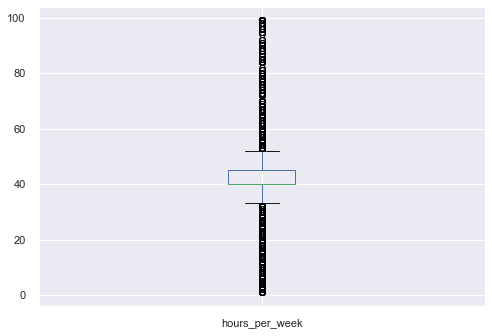

In [45]:
# set a grey background.
sns.set(style="darkgrid")

# Display box and whisker plots.
df['hours_per_week'].plot(kind='box')

# Display plot.
plt.show()

#### Interpretation:
Lot's of outliers for hours per week, but that is probably because the vast majority of people work a 40 hour workweek.

### Capital_diff

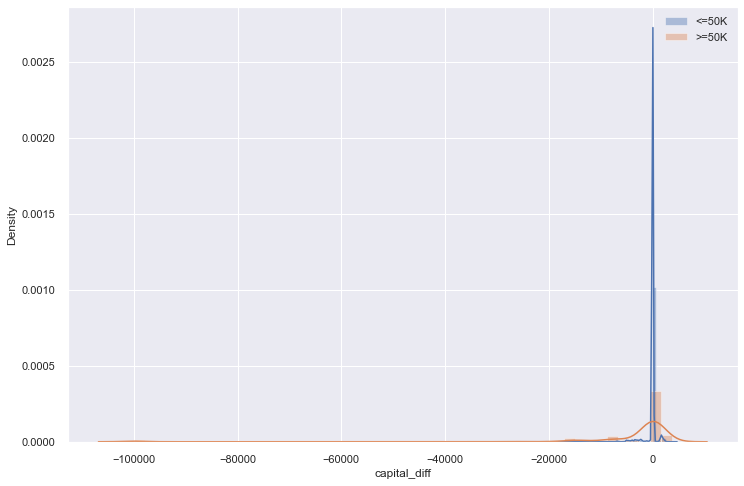

In [46]:
# set a grey background.
sns.set(style="darkgrid")

# Set plot layout.
fig, ax = plt.subplots(figsize=(12, 8))

# Make indicator for "income" plot.
mask = df["income"] == "<=50K"

# Split data by indicator.
ax = sns.distplot(df[mask]["capital_diff"], label='<=50K')
ax = sns.distplot(df[~mask]["capital_diff"],label='>=50K')

# Add legend.
ax.legend()

#### Interpretation:
If people had a change in capital gain, those making less than 50,000 per year were more likely to have lost money, and those making more than 50,000 per year were more likely to have earned money.

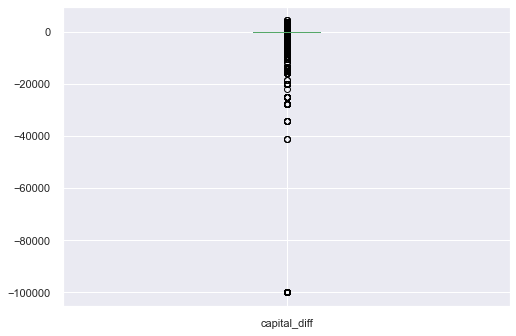

In [47]:
# set a grey background.
sns.set(style="darkgrid")

# Display box and whisker plots.
df['capital_diff'].plot(kind='box')

# Display plot.
plt.show()

#### Interpretation:
Most people did not see any capital gain/loss. Therefore, any change in capital is an outlier.

### Continuous variables

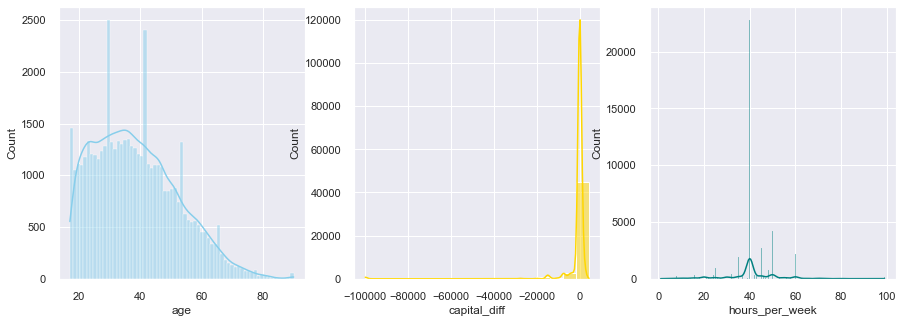

In [48]:
# set a grey background.
sns.set(style="darkgrid")

# Set plot layout.
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot continuous predictors side-by-side.
sns.histplot(data=df, x="age", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data=df, x="capital_diff", kde=True, color="gold", ax=axs[1])
sns.histplot(data=df, x="hours_per_week", kde=True, color="teal", ax=axs[2])

# Display plot.
plt.show()

#### Interpretation:
Continuous variable do not exactly fall within the same range. Standardisation will fix that.

In [49]:
# List of variables I want to standardise.
col_names = ['age', 'capital_diff', 'hours_per_week']

# Select variables to standardise from dataframe.
features = df[col_names]

# Set StandardScaler instance.
scaler = StandardScaler().fit(features.values)

# Make array of standardised values corresponding to the columns in the dataframe.
features = scaler.transform(features.values)

# Convert standardised array to pandas dataframe.
scaled_features = pd.DataFrame(features, columns = col_names)

# Glimps standardised dataframe.
scaled_features.head()

,age,capital_diff,hours_per_week
0,-0.995129,0.132642,-0.034087
1,-0.046942,0.132642,0.772930
2,-0.776316,0.132642,-0.034087
3,0.390683,-0.895787,-0.034087
4,-1.505691,0.132642,-0.841104


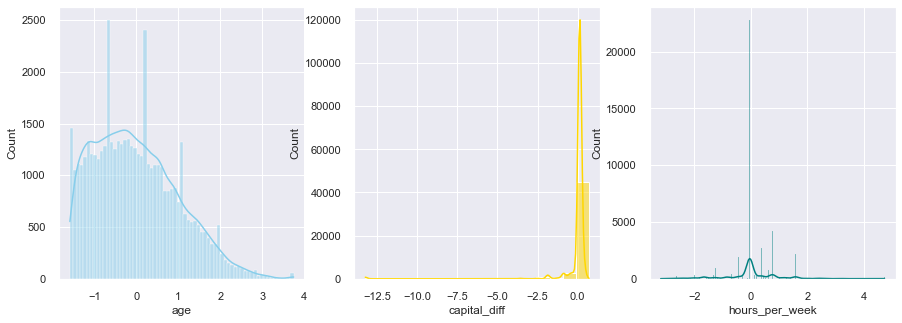

In [50]:
# set a grey background.
sns.set(style = "darkgrid")

# Set plot layout.
fig, axs = plt.subplots(1, 3, figsize = (15, 5))

# Plot continuous predictors side-by-side.
sns.histplot(data = scaled_features, x = "age", kde = True, color = "skyblue", ax = axs[0])
sns.histplot(data = scaled_features, x = "capital_diff", kde = True, color = "gold", ax = axs[1])
sns.histplot(data = scaled_features, x = "hours_per_week", kde = True, color = "teal", ax = axs[2])

# Display plot.
plt.show()

In [51]:
# Replace non-standardised columns with standardised columns.
df = df.assign(age = scaled_features['age'], capital_diff = scaled_features['capital_diff'], hours_per_week = scaled_features['hours_per_week'])

In [52]:
# Glimps dataframe.
df.head()

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,income,capital_diff
0,-0.995129,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,-0.034087,United-States,<=50K,0.132642
1,-0.046942,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.772930,United-States,<=50K,0.132642
2,-0.776316,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,-0.034087,United-States,>50K,0.132642
3,0.390683,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,-0.034087,United-States,>50K,-0.895787
4,-1.505691,Private,103497,Some-college,Never-married,Prof-speciality,Own-child,White,Female,-0.841104,United-States,<=50K,0.132642


### fnlwgt

In [53]:
# Display number of unique "fnlwgt" labels.
df['fnlwgt'].nunique()

28523

Conclusion: So many unique labels, I'm not convinced they will be useful for learning. They should be dropped.

In [54]:
# Drop "fnlwgt" from dataframe.
df = df.drop(columns = ['fnlwgt'])

### Dummy Coding

In [55]:
# Make list displaying whether a column is continuous or object-based.
s = (df.dtypes == 'object')

s = s.drop(['income'])

# Make list of column names with object instances.
object_cols = list(s[s].index)

# Print names of all columns with categorical instances.
print("Categorical variables:", "\n")
print(object_cols)

Categorical variables: 

['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'gender', 'native_country']


In [56]:
# Dummy code categorical predictors. 
df = pd.concat([df, pd.get_dummies(data = df, columns = list(s[s].index), drop_first = True)], axis = 1)

In [57]:
# Glimpse data.
df.head()

,age,workclass,education,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,income,capital_diff,age,hours_per_week,income,capital_diff,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital_status_Married-AF-spouse,marital_status_Married-civ-spouse,marital_status_Married-spouse-absent,marital_status_Never-married,marital_status_Separated,marital_status_Widowed,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-speciality,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male,native_country_Canada,native_country_China,native_country_Columbia,native_country_Cuba,native_country_Dominican-Republic,native_country_Ecuador,native_country_El-Salvador,native_country_England,native_country_France,native_country_Germany,native_country_Greece,native_country_Guatemala,native_country_Haiti,native_country_Holand-Netherlands,native_country_Honduras,native_country_Hong,native_country_Hungary,native_country_India,native_country_Iran,native_country_Ireland,native_country_Italy,native_country_Jamaica,native_country_Japan,native_country_Laos,native_country_Mexico,native_country_Nicaragua,native_country_Outlying-US(Guam-USVI-etc),native_country_Peru,native_country_Philippines,native_country_Poland,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,-0.995129,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,-0.034087,United-States,<=50K,0.132642,-0.995129,-0.034087,<=50K,0.132642,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,-0.046942,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.772930,United-States,<=50K,0.132642,-0.046942,0.772930,<=50K,0.132642,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,-0.776316,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,-0.034087,United-States,>50K,0.132642,-0.776316,-0.034087,>50K,0.132642,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0.390683,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,-0.034087,United-States,>50K,-0.895787,0.390683,-0.034087,>50K,-0.895787,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,-1.505691,Private,Some-college,Never-married,Prof-speciality,Own-child,White,Female,-0.841104,United-States,<=50K,0.132642,-1.505691,-0.841104,<=50K,0.132642,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [58]:
# Remove non-dummy coded object columns.
df.drop(object_cols, axis = 1, inplace = True)

In [59]:
# Recheck dataframe.
df.head()

,age,hours_per_week,income,capital_diff,age,hours_per_week,income,capital_diff,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital_status_Married-AF-spouse,marital_status_Married-civ-spouse,marital_status_Married-spouse-absent,marital_status_Never-married,marital_status_Separated,marital_status_Widowed,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-speciality,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male,native_country_Canada,native_country_China,native_country_Columbia,native_country_Cuba,native_country_Dominican-Republic,native_country_Ecuador,native_country_El-Salvador,native_country_England,native_country_France,native_country_Germany,native_country_Greece,native_country_Guatemala,native_country_Haiti,native_country_Holand-Netherlands,native_country_Honduras,native_country_Hong,native_country_Hungary,native_country_India,native_country_Iran,native_country_Ireland,native_country_Italy,native_country_Jamaica,native_country_Japan,native_country_Laos,native_country_Mexico,native_country_Nicaragua,native_country_Outlying-US(Guam-USVI-etc),native_country_Peru,native_country_Philippines,native_country_Poland,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,-0.995129,-0.034087,<=50K,0.132642,-0.995129,-0.034087,<=50K,0.132642,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,-0.046942,0.772930,<=50K,0.132642,-0.046942,0.772930,<=50K,0.132642,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,-0.776316,-0.034087,>50K,0.132642,-0.776316,-0.034087,>50K,0.132642,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0.390683,-0.034087,>50K,-0.895787,0.390683,-0.034087,>50K,-0.895787,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,-1.505691,-0.841104,<=50K,0.132642,-1.505691,-0.841104,<=50K,0.132642,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### Check For Duplicate Columns

In [60]:
# Get list of duplicate columns
duplicateColumnNames = getDuplicateColumns(df)
print('Duplicate Columns are as follows')

# Loop that prints contents of duplicate list.
for col in duplicateColumnNames:
    print('Column name : ', col)

Duplicate Columns are as follows
Column name :  hours_per_week
Column name :  income
Column name :  capital_diff
Column name :  age


In [61]:
# Remove duplicate columns.
df = df.loc[:, ~df.columns.duplicated()]

In [62]:
# Get list of duplicate columns
duplicateColumnNames = getDuplicateColumns(df)
print('Duplicate Columns are as follows')

# Loop that prints contents of duplicate list.
for col in duplicateColumnNames:
    print('Column name : ', col)

Duplicate Columns are as follows


# Machine Learning Model

### Define X And Y

In [63]:
# Define response variable.
y = df['income']

# Define predictor variables.
X = df.drop(columns = "income")

# Define label encoder.
lab = preprocessing.LabelEncoder()

# Transform response variable vector (y) to numeric.
y = lab.fit_transform(y)

# Invert numeric response variables (so that <50K is a positive class).
y = np.where((y==0)|(y==1), y^1, y)

# Print numerical y.
print("Numerical y:", y)

# Invert numerical y and print label.
print("Labelled y:", lab.inverse_transform(y))

Numerical y: [1 1 0 ... 1 1 0]
Labelled y: ['>50K' '>50K' '<=50K' ... '>50K' '>50K' '<=50K']


A cursory glance at the first and last few response variables show that "1" = ">50K" and "0" = "<50K".

### Define Training, Validation, And Testing Sets

In [64]:
# Split into train/test sets.
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 42,stratify=y)

# Get validation for hyperparameter tuning.
X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train, y_train, test_size = 0.25, random_state = 1,stratify=y_train)

# Print size of training, validation, and testing set for verification.
print('X_Train Shape =', round(X_train.shape[0]/48842 * 100),'%')
print('X_Validate Shape =', round(X_val.shape[0]/48842 * 100),'%')
print('X_Test Shape =', round(X_test.shape[0]/48842 * 100),'%')
print('') # Add space.

X_Train Shape = 60 %
X_Validate Shape = 20 %
X_Test Shape = 20 %



### Testing Different Classifiers
I'll first test a dummy classifier. This classifier randomly guesses which class each observation belongs to. This will be a soft benchmark that all machine learning classifiers I test must pass. Then I will test a series of different classes of classifier to get a rough benchmark. From there, I will pick the best one and further test it.

In [65]:
# Create dataframe of classifier performance using testClassifier() function.
testClassifiers([DummyClassifier,
                 LogisticRegression,
                 DecisionTreeClassifier,
                 KNeighborsClassifier,
                 GaussianNB,
                 RandomForestClassifier,
                 xgboost.XGBClassifier],
                X_train, y_train, X_test, y_test)

[10:36:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Classifier,Accuracy,Recall,Precision
0,DummyClassifier,0.760672,1.000000,0.760672
1,LogisticRegression,0.846760,0.926389,0.878734
2,DecisionTreeClassifier,0.812366,0.863814,0.886602
3,KNeighborsClassifier,0.827413,0.905800,0.872230
4,GaussianNB,0.547548,0.421208,0.963373
5,RandomForestClassifier,0.840618,0.910510,0.883521
6,XGBClassifier,0.873170,0.942269,0.896313


The xgboost algorithm has the highest overall accuracy. So I'll move forward with it. Before doing so, however, I will try model-stacking all tested models to see if it improves the overall accuracy.

### Stacked Model
Stacked models combine the outputs of a bunch of previously tested models in an attempt to improve fit. Here I'll take all of the previous model's outputs and see if that can achieve better results than the xgboost algorithm.

In [66]:
# Stacked Models for simultanious stacking.
clfs = [x() for x in [LogisticRegression,
                      DecisionTreeClassifier,
                      KNeighborsClassifier,
                      GaussianNB,
                      RandomForestClassifier,
                      xgboost.XGBClassifier]]

# Specify stacking classifier..
stack = StackingClassifier(classifiers = clfs,meta_classifier = LogisticRegression())

# Use 10-fold cross-validation.
kfold = model_selection.KFold(n_splits = 10)

# Get stacked model score.
s = model_selection.cross_val_score(stack, X_train, y_train, scoring = "roc_auc", cv = kfold)

# Print stacked model accuracy and standard deviation.
print(f"{stack.__class__.__name__} " f"AUC: {s.mean():.3f} STD: {s.std():.2f}")

[10:36:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:36:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:37:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:38:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

### XGBoost Base Model

In [67]:
# Change xgboost handle.
import xgboost as xgb

# Specify xgboost classifier.
xgb_class = xgb.XGBClassifier(random_state = 42)

# Fit xgboost model.
xgb_class.fit(X_train, y_train, early_stopping_rounds = 10, eval_set = [(X_val, y_val)], verbose = False)

[10:42:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [68]:
# Plot validation set accuracy.
xgb_class.score(X_val, y_val)

0.8702016583068891

### XGBoost Grid Search
I want to run a grid search, but as seen above, xgboost has a ton of parameters. In an ideal world, I could tune the model to every iteration of parameters, but here, it would take too long. THerefore I'm only going to focus on the main parameters.

Here is a parameter dictionary with the parameters I want to tune:

In [69]:
# Parameter dictionary. I will update these based on the best parameters found during grid search.
params = {
    # Parameters:
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    'objective':'binary:logistic',
}

In [70]:
# Tuning 'max_depth' and 'min_child_weight'.

# Set first grid search model.
xgb_grid1 = xgb.XGBClassifier()

# Set parameter range for grid search.
params = {"max_depth": np.arange(1, 9, 1),
          "min_child_weight": np.arange(1, 9, 1)}

# Fit training data to all parameter combinations.
cv = model_selection.GridSearchCV(xgb_grid1, params, n_jobs = -1).fit(X_train, y_train)

# Print parameters that result in highest prediction accuracy.
print(cv.best_params_)

[10:52:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'max_depth': 4, 'min_child_weight': 1}


In [71]:
# Update parameter list with gridsearch's best parameters.
params['max_depth'] = 4
params['min_child_weight'] = 2

In [72]:
# Start tuning 'subsample' and 'colsample_bytree'.

# Set second grid search model.
xgb_grid2 = xgb.XGBClassifier()

# Set parameter range for grid search.
params = {'subsample': np.arange(0.1, 0.9, 0.1),
          'colsample_bytree': np.arange(0.1, 0.9, 0.1)}

# Fit training data to all parameter combinations.
cv = model_selection.GridSearchCV(xgb_grid1, params, n_jobs = -1).fit(X_train, y_train)

# Print parameters that result in highest prediction accuracy.
print(cv.best_params_)

[11:01:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'colsample_bytree': 0.2, 'subsample': 0.8}


In [73]:
# Update parameter list with gridsearch's best parameters.
params['subsample'] = 0.8
params['colsample_bytree'] = 0.3

In [74]:
# Start tuning 'eta'.

# Set second grid search model.
xgb_grid3 = xgb.XGBClassifier()

# Set parameter range for grid search.
params = {'eta': [.3, .2, .1, .05, .01, .005]}

# Fit training data to all parameter combinations.
cv = model_selection.GridSearchCV(xgb_grid3, params, n_jobs = -1).fit(X_train, y_train)

# Print parameters that result in highest prediction accuracy.
print(cv.best_params_)

[11:03:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'eta': 0.1}


In [75]:
# Update parameter list with gridsearch's best parameter.
params['eta'] = 0.2

In [76]:
# Change xgboost handle.
import xgboost as xgb

# Specify xgboost classifier.
xgb_class = xgb.XGBClassifier(random_state = 42,
                              eta = 0.2,
                              ubsample= 0.8,
                              colsample_bytree= 0.3,
                              max_depth= 4,
                              min_child_weight= 2,
                             use_label_encoder=False)

# Fit xgboost model.
xgb_class.fit(X_train, y_train, early_stopping_rounds = 10, eval_set = [(X_val, y_val)], verbose = False)

[11:03:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "ubsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:03:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, eta=0.2, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.200000003, max_delta_step=0, max_depth=4,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', ubsample=0.8, use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [77]:
y_train

array([1, 1, 1, ..., 1, 0, 0])

In [78]:
# Plot validation set accuracy.
xgb_class.score(X_test, y_test)

0.8713276691575391

#### Interpretation:
While the gridsearch identified different parameter values than those selected by the inital model fit, their combined effect does not enhance or detract the total accuracy.

# Model Evaluation

### Validation Curve
The validation curve can help us see how different parameter levels affect classification accuracy.

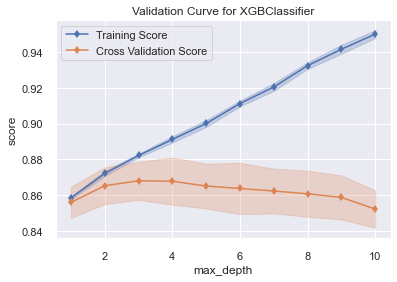

In [79]:
# Set plot layout.
fig, ax = plt.subplots(figsize=(6, 4))

# Validation curve specificaions.
vc_viz = ValidationCurve(xgboost.XGBClassifier(verbosity = 0),
                         param_name = "max_depth",
                         param_range = np.arange(1, 11),
                         cv = 10,
                         scoring = "accuracy",
                         n_jobs = -1)

# Run validation curve.
vc_viz.fit(X_test, y_test)

# Plot validation curve.
vc_viz.poof();

# Save validation curve plot.
fig.savefig("images/ValidationCurve.png", dpi = 300)

#### Interpretation:
The validation score is what we want to maximize here. It looks like a max tree depth of 2 or 3 would be optimal, altohugh it doesn't really change the overall model accuracy. Max depth was tuned to 4, but that still looks good based on the curve.

### Learning Curve
This can show us a number of things. First, it can indicate whether more data should be collected, and it can inform us as to whether the model is overfitting or underfitting to the data.

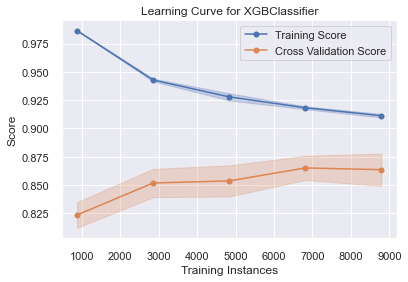

In [80]:
# Set plot layout.
fig, ax = plt.subplots(figsize = (6, 4))

# Learning curve specificaions.
lc3_viz = LearningCurve(xgboost.XGBClassifier(n_estimators = 100), cv = 10)

# Run learning curve.
lc3_viz.fit(X_test, y_test)

# Plot learning curve.
lc3_viz.poof();

# Save learning curve plot.
fig.savefig("images/LearningCurve.png", dpi = 300)

#### Interpretation:
FIrst, it looks like collecting more data would lead to very mediocre improvements to the cross-validation score: it has essentially plateued. There is very little variability in the training score (the "cloud" around the line) so we know the model is not biased (i.e. no underfitting). There is some variability in the cross-validation score, indicating that the model may have some variance (i.e. some overfitting). However, this does not look too bad.

# Metrics And Classification Evaluation

### Confusion Matrix

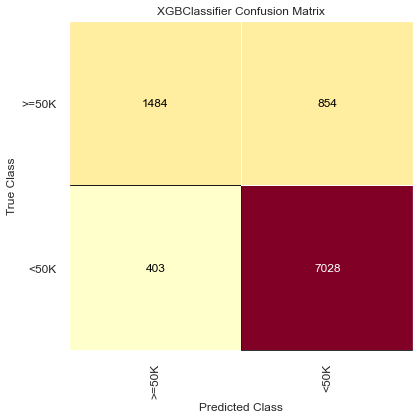

In [81]:
fig, ax = plt.subplots(figsize = (6, 6))
cm_viz = ConfusionMatrix(xgb_class, classes = [">=50K", "<50K"], label_encoder = {0: ">=50K", 1: "<50K"})
cm_viz.score(X_test, y_test)
cm_viz.poof();
fig.savefig("images/ConfusionMatrix.png", dpi = 300)

#### Interpretation:
Since we defined <50K as being the positive class, we will consider the bottom right corner to be true positives, and the top left corner to be true negatives.

In [82]:
# Defining true positives (tp), false positives (fp), false negatives (fn), and true negatives (tn).
tp = 7028
fp = 854
fn = 403
tn = 1484

### Accuracy
First, Let's see, overall, how well the classifier correctly predicts positive and negative classes.

#### Manual Calculation

In [83]:
(tp + tn)/(tp + fp + fn + tn)

0.8713276691575391

#### ScikitLearn Calculation

In [84]:
# Make predictions on test set.
y_predict = xgb_class.predict(X_test)

# Compute test set accuracy.
accuracy_score(y_test, y_predict)

0.8713276691575391

#### Interpretation: 
Our model can accurately identify ~88% of people above and below 50,000 per year. But, classes were unbalanced (i.e. their are far more people making below 50,000 per year). Thus, one could acheive relatively high overall accuracy by just predicting every sample belongs to the class <50,000. In this situation, it's better to look at how well the xgboost algorithm predicts specific classes on a few metrics.

### Recall/Sensitivity (True Positive Rate)
Recall tells us how many positive cases the classifier actually identified as positive.

#### Manual Calculation

In [85]:
tp/(tp + fn)

0.9457677297806486

In [86]:
y_predict = xgb_class.predict(X_test)
recall_score(y_test, y_predict)

0.9457677297806486

#### Interpretation:
95% of people making less than 50,000 per year were correctly identified.

### Precision
Precision tells us how many positive predictions were actually correct.

In [87]:
tp/(tp + fp)

0.8916518650088809

In [88]:
y_predict = xgb_class.predict(X_test)
precision_score(y_test, y_predict)

0.8916518650088809

#### Interpretation:
Of all the times our classifier predicted someone made less than 50,000 per year, it was correct 89% of the time.

### F1 (Harmonic Mean)
The F1 score is a combination of recall and precision scores. Importantly, we shouldn't use the f1 score to assess the model's accuracy. Rather, the f1 score can be useful for comparing different classifier  models.

In [89]:
(2 * (tp / (tp + fp)) * (tp / (tp + fn))) / ((tp / (tp + fp)) + (tp / (tp + fn)))

0.9179128844772415

In [90]:
y_predict = xgb_class.predict(X_test)
f1_score(y_test, y_predict)

0.9179128844772415

#### Interpretation:
The harmonic mean is 92%, and is a weighted average between precision and recall.

### Classification Report

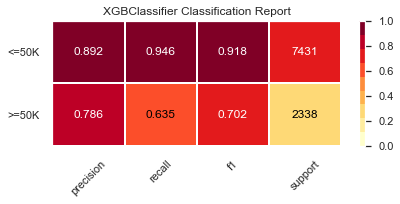

In [91]:
#mapping = {0: ">=50K", 1: "<=50K"}
fig, ax = plt.subplots(figsize=(6, 3))
cm_viz = ClassificationReport(xgb_class, classes = [">=50K", "<=50K"], label_encoder = {0: ">=50K", 1: "<=50K"}, support= True)
cm_viz.score(X_test, y_test)
cm_viz.poof();
fig.savefig("images/ClassificationReport.png", dpi=300)

#### Interpretation:
For the positive class, we have already interpreted the results.

For the negative class, the clssifier seems much less competant overall. First, of all negative predictions it made, it was right 79% of the time (Precision). Second, of all the negative cases the classifier encountered, only 64% were classified correctly (Recall).

If we only cared about identifying people making <50K, this might be a good classifier. However, if we also cared about people making >50K, we might want to make some improvements. Right now, we will pretend the classifier is good. Later, I will rebalance these errors to show what to do if we are unhappy with the classifiers >50K prediction performance.

### ROC
An ROC illustrates how the classifier performs by tracking the true positive rate (recall/sensitivity) as the false positive rate (inverted specificity) changes. The plot should bulge to the left, indicating a good balance between true and false positives.

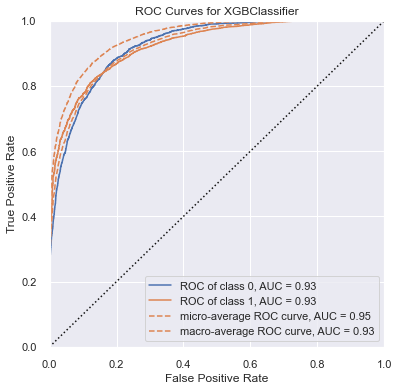

In [92]:
# Set plot layout.
fig, ax = plt.subplots(figsize=(6, 6))
roc_viz = ROCAUC(xgb_class)
roc_viz.fit(X_train, y_train) 
roc_viz.score(X_test, y_test)
roc_viz.poof();
fig.savefig("images/ROC.png", dpi=300)

#### Interpretation:

### Precision-Recall Curve
The ROC curve may be overly optimistic for imbalanced classes. Another option for evaluating classifiers is using a precision-recall curve (see Figure 12-5). Classification is a balancing act of finding everything you need (recall) while limiting the junk results (precision). This is typically a trade-off. As recall goes up, precision usually goes down and vice versa.

0.9751016424356029


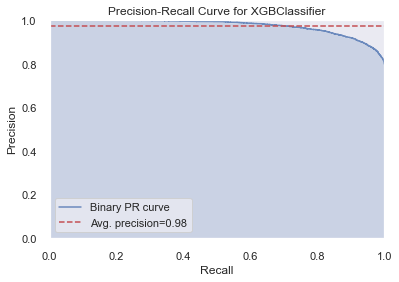

In [93]:
# Set plot layout.
fig, ax = plt.subplots(figsize=(6, 4))
viz = PrecisionRecallCurve(xgb_class)
viz.fit(X_train, y_train)
print(viz.score(X_test, y_test))
viz.poof();
fig.savefig("images/PrecisionRecallCurve.png", dpi=300)

#### Interpretation:
This can give us some indication about how precision and recall change as a function of one another. If we wanted to improve recall, we woud need to lower precision (and vis versa).

### Cumulative Gains Plot
This plot visualising the gain in true positives (sensitivity) for a given fraction of the total population targeted by the classifier. So, as we sample more of the dataset, we can see how it affects the true positive rate. If, for instance, we wanted to find 80% of the population that made <50K, we could trace the plot below from 0.8 on the y-axis to the blue line, and the corresponding x-axis would tell us the fraction of the populaton we might need to sample to find 80%.

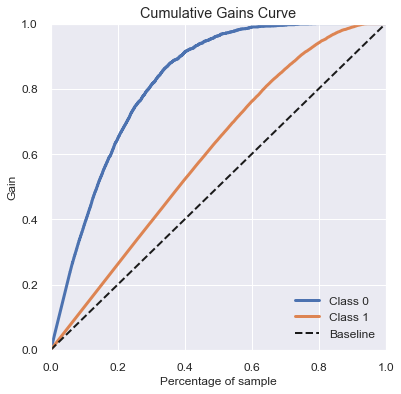

In [94]:
# Set plot layout.
fig, ax = plt.subplots(figsize=(6, 6))
y_probas = xgb_class.predict_proba(X_test)
scikitplot.metrics.plot_cumulative_gain(y_test, y_probas, ax=ax);
fig.savefig("images/CumulativeGains.png",dpi=300,bbox_inches="tight")

#### Interpretation:

If there is a cost to contacting people, this may give an idea of how much the cost is. For instance, if I sampled 40% of the dataset, I would already haveover 90% of people making <50K. If this was all we cared about, it may be useful to know that we won't need to contact 10,000 people in the future. However, at 40% we also only have less than 50% of people making >50K. If we wanted to find more than 90% of them, we would potentially need to contact 10,000+ people.

### Lift Curve
Lift curve shows the ratio between the proportion of true positive instances in the selection and the proportion of people sampled.

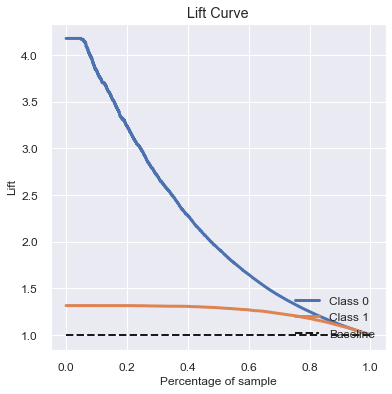

In [95]:
# Set plot layout.
fig, ax = plt.subplots(figsize=(6, 6))
y_probas = xgb_class.predict_proba(X_test)
scikitplot.metrics.plot_lift_curve(y_test, y_probas, ax=ax);
fig.savefig("images/Lift.png",dpi=300,bbox_inches="tight")

#### Interpretation:
The baseline line (dashed) shows us how a random classifier would perform. We can see that, if we only sampled 20% of our dataset, we would already find nearly 3.5 times more people <50K a year than a random classifier. We see much less improvement regarding the classification of people making >50K, but also no real decrease to lift as we sample more people.

### Class Balance
When classes are unbalanced, accuracy is not a good metric for classification performance.

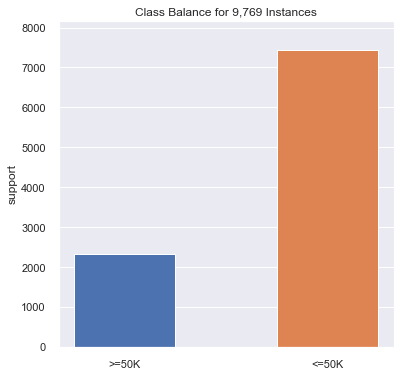

In [96]:
# Set plot layout.
fig, ax = plt.subplots(figsize=(6, 6))
cb_viz = ClassBalance(labels=[">=50K", "<=50K"])
cb_viz.fit(y_test)
cb_viz.poof();
fig.savefig("images/ClassBalance.png", dpi=300)

#### Interpretation:
Classes are unbalanced, which is good since we want our testing set to contain relatively the same proportion of positive and negative instances.

### Class Prediction Error
This plot gives us the same information as the confusion matrix, but we also get a better sense of class balance (which is unbalanced in this dataset).

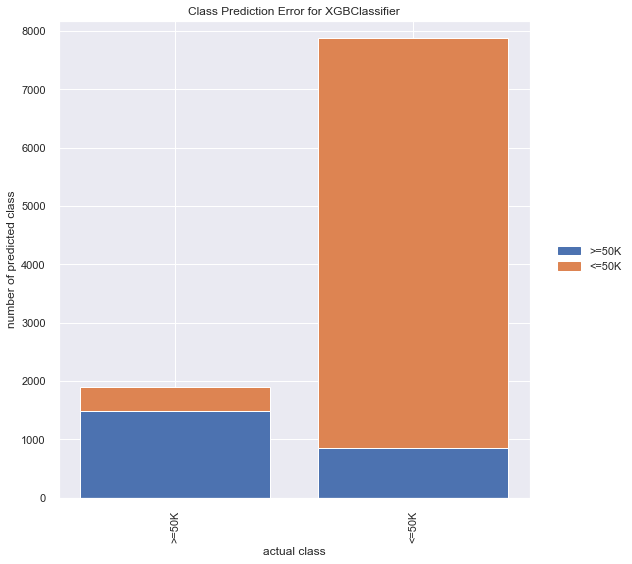

In [97]:
# Set plot layout.
fig, ax = plt.subplots(figsize=(10, 8))
cpe_viz = ClassPredictionError(xgb_class, classes=[">=50K", "<=50K"])
cpe_viz.score(X_test, y_test)
cpe_viz.poof();
fig.savefig("images/ClassPredictionError.png", dpi=300)

#### Interpretation:
The top right bar shows the the true positives, the bottom right shows the false negatives, the top left shows the flase positives, and the bottom left shows the true negatives.

### Discrimination Threshold
Here we can view the tradeoff between precision and recall, and figure out how to shift the classifier's decision boundary should we decide to improve one metric over the other. 

If we want to identify every person who makes <50K, we would enhance recall over precision, and would decrease our false negative rate as well. Subsequently, however, our false positive rate would go up (because we would be biasing the classifier towards positive predictions.

Conversely, if we only want to identify people who make <50K if they actually make <50K, we would instead enhance precision over recall, decreasing our false positive rate in the process. However, our false negative rate would also go up (because the classifier would now be biased

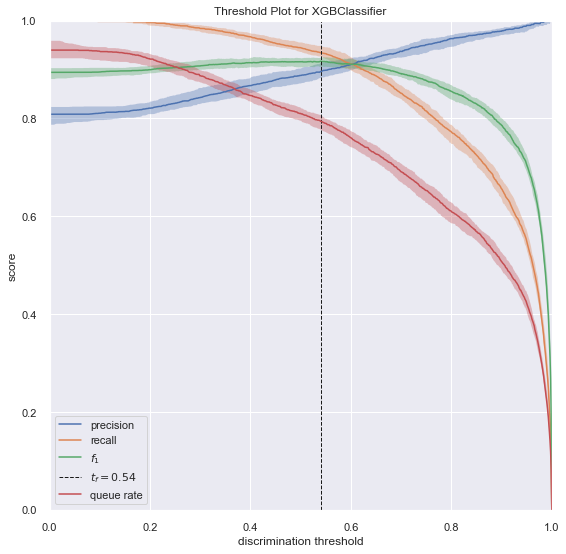

In [98]:
# Set plot layout.
fig, ax = plt.subplots(figsize=(9, 9));
dt_viz = DiscriminationThreshold(xgb_class);
dt_viz.fit(X_test, y_test);
dt_viz.poof();
fig.savefig("images/DiscriminationThreshold.png", dpi=300)

#### Interpretation:


### Tuning Decision Threshold
Depending on the goal of the project, we may want to change the decision threshold to suite the objective better. First, we will look at the metrics again.

The precision score is: 0.89
The recall score is: 0.95 

Accuracy score is: 0.87
The F1 score is: 0.92


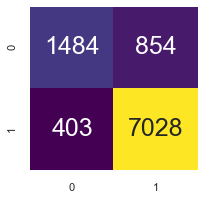

In [99]:
predictions = xgb_class.predict(X_test)

print("The precision score is: %.2f" % precision_score( y_test, predictions))
print("The recall score is: %.2f" % recall_score( y_test, predictions), "\n")
print("Accuracy score is: %.2f" % accuracy_score( y_test, predictions))
print("The F1 score is: %.2f" % f1_score( y_test, predictions))

cm = confusion_matrix( y_test , predictions)
plt.figure(figsize = (3,3))
sns.heatmap(cm, annot=True, annot_kws={"size": 25}, fmt="d", cmap="viridis", cbar=False)
plt.show()

#### Identify Everyone Making <50K
If the goal is to identify people making more than $50,000 per year, recall should be increased. 

The precision score is: 0.83
The recall score is: 0.99 

Accuracy score is: 0.84
The F1 score is: 0.90


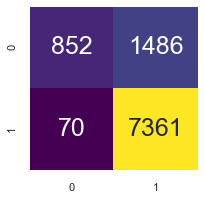

In [100]:
discrimination_threshold = 0.25
predictions = xgb_class.predict_proba(X_test)
predictions = (predictions[::,1] > discrimination_threshold )*1

print("The precision score is: %.2f" % precision_score( y_test, predictions))
print("The recall score is: %.2f" % recall_score( y_test, predictions),"\n")

print("Accuracy score is: %.2f" % accuracy_score( y_test, predictions))
print("The F1 score is: %.2f" % f1_score( y_test, predictions))

cm = confusion_matrix( y_test , predictions)
plt.figure(figsize = (3,3))
sns.heatmap(cm, annot=True, annot_kws={"size": 25}, fmt="d", cmap="viridis", cbar=False)
plt.show()

#### Correctly Identify Everyone Making <50K
If we don't want incorrectly identify people making <50K, precision should be increased.

The precision score is: 0.99
The recall score is: 0.54 

Accuracy score is: 0.65
The F1 score is: 0.70


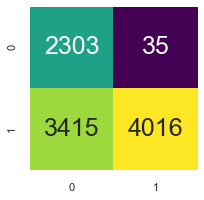

In [101]:
discrimination_threshold = 0.95
predictions = xgb_class.predict_proba(X_test)
predictions = (predictions[::,1] > discrimination_threshold )*1

print("The precision score is: %.2f" % precision_score( y_test, predictions))
print("The recall score is: %.2f" % recall_score( y_test, predictions),"\n")

print("Accuracy score is: %.2f" % accuracy_score( y_test, predictions))
print("The F1 score is: %.2f" % f1_score( y_test, predictions))

cm = confusion_matrix( y_test , predictions)
plt.figure(figsize = (3,3))
sns.heatmap(cm, annot=True, annot_kws={"size": 25}, fmt="d", cmap="viridis", cbar=False)
plt.show()

# Model Exploration

### LIME
LIME performs local, rather than overall, interpretation. That is, for a given sample, it fits a model to that single instance and determines the extent to which each predictor pushes the classification towards the classifiers prediction. This might be good if their are outliers, or a few observations that stand out. Below, I randomly chose the 4th observation of the training set to show an example.

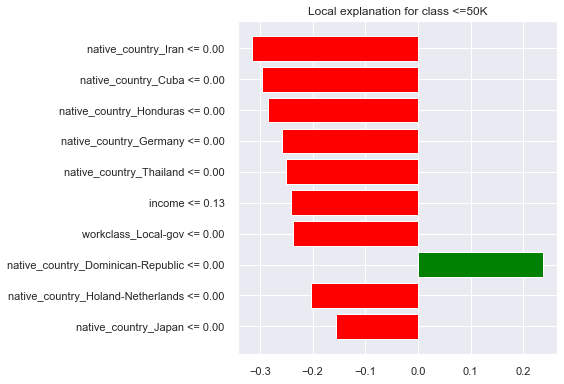

In [102]:

explainer = lime_tabular.LimeTabularExplainer(X_train.values,
                                              feature_names=df.columns,
                                              class_names=[">=50K", "<=50K"])

exp = explainer.explain_instance(X_train.iloc[3].values, xgb_class.predict_proba)

fig = exp.as_pyplot_figure()
fig.tight_layout()
#fig.savefig("images/mlpr_1301.png")

#### Interpretation:


In [5]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(xgb_class)
shap_values = explainer(X_test)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[2])

NameError: name 'xgb_class' is not defined

#### Interpretation:


In [ ]:
xgb_class.predict_proba(X_test.iloc[[3]])

In [ ]:
shap.initjs()
import shap
s = shap.TreeExplainer(xgb_class)
shap_vals = s.shap_values(X_test)
#target_idx = 12
shap.force_plot(
s.expected_value,
shap_vals[3, :],
feature_names=X_test.columns)

#### Interpretation:


In [2]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

NameError: name 'shap' is not defined

#### Interpretation:


In [4]:
shap.plots.bar(shap_values)

NameError: name 'shap_values' is not defined

#### Interpretation

In [ ]:
shap.initjs()
shap.plots.scatter(shap_values[:,"gender_Male"], color=shap_values)